In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
import seaborn as sns
import os
from PIL import Image, ImageOps

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [7]:
l_df = pd.read_csv('bsc-3m/signals_dense.csv')

In [8]:
with open('bsc-3m/signal_lines_true.pickle', 'rb') as f:
    l_xy = pickle.load(f)

In [25]:
def get_xy_frame(frame):
    mask = nndf['frame'] == frame
    return nndf.loc[mask][['x', 'y']]

In [2]:
import matplotlib as mpl 
mpl.rcParams['animation.ffmpeg_path'] = r'D:\ffmpeg\bin\ffmpeg.exe'

In [3]:
with open('bsc-3m/traj_01_elab.pkl', 'rb') as f:
    df = pickle.load(f)
with open('bsc-3m/traj_01_elab_new.pkl', 'rb') as f:
    ddf = pickle.load(f)
df = df.join(ddf['frames'])

In [4]:
d = {
    'x' : [],
    'y' : [],
    'frame' : [],
    'class' : [],
    'id' : []
}

for _, row in df.iterrows():
    for i in range(len(row['xs'])):
        d['x'].append(row['xs'][i])
        d['y'].append(row['ys'][i])
        d['frame'].append(row['frames'][i])
        d['class'].append(row['class'])
        d['id'].append(row['id'])
nndf = pd.DataFrame(d)

In [5]:
class_color = {
    'Bicycle' : 'r', 
    'Bus' : 'b', 
    'Car' : 'b', 
    'Heavy Vehicle' : 'b', 
    'Light Truck' : 'b',
    'Motorcycle' : 'b', 
    'Pedestrian' : 'g', 
    'Van' : 'b'
}

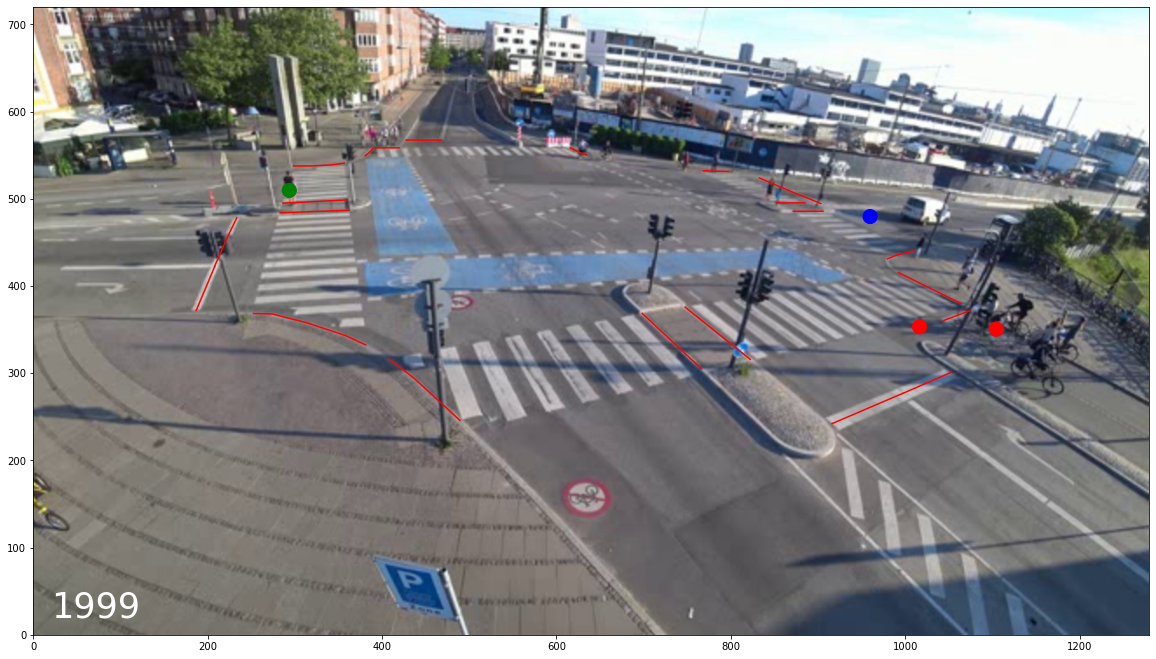

In [17]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_xlim(0,1280)
ax.set_ylim(0,720)
img = Image.open("intersection2.png")
img = ImageOps.flip(img)

im = ax.imshow(img, origin='lower')
ln = [ax.plot([],[])[0] for _ in range(l_df.shape[-1]-1)]
txt = ax.text(20,20, '', fontsize=35, color='w')
sc = ax.scatter([], [], s=200)
patches = ln + [sc] + [txt] + [im]

def init():
    for i in range(len(ln)):
        ln[i].set_data(l_xy[i]['x'], l_xy[i]['y'])
    
    return patches

def update(frame):
    row = l_df.loc[frame]
    for i in range(l_df.shape[1]-1):
        ln[i].set_color(['red', 'orange', 'yellow', 'green'][row[str(i)]])
    
    txt.set(text=str(frame))
    
    mask = nndf['frame'] == frame
    xy = nndf.loc[mask][['x', 'y']].to_numpy()
    sc.set_offsets(xy)
    sc.set(color=[class_color[row['class']] for _, row in nndf.loc[mask].iterrows()])
    
    img = Image.open('frames/frame'+str(frame)+'.jpg') #+ pic_frames[frame])
    img = ImageOps.flip(img)
    im.set_array(img)
    
    return patches

ani = FuncAnimation(fig, update, frames=np.arange(0,2000),    # np.arange(0, 12000, 10), # interval=30,
                    init_func=init)#, blit=True)

Writer = writers['ffmpeg']
writer = Writer(fps=30) # , bitrate=1800)
ani.save('movies/movie_sync.mp4', writer)